# Regression diagnostic and removing outlier in boston housing dataset

In [44]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as sm
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time
import pandas as pd
from sklearn.datasets import load_boston
boston= load_boston()

In [45]:
boston= load_boston()

#Create analytical data set
#Create dataframe from feature_names
boston_features_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

#Create dataframe from target
boston_target_df = pd.DataFrame(data=boston.target,columns=['MEDV'])

#Partition the data
#Create training and test datasets
#We know from prior work that two variables were not significant contributors 
#and need to be removed (AGE and INDUS)
# Drop AGE and INDUS
boston_features2_df=boston_features_df.drop(columns=['AGE', 'INDUS'])

#Partition dataset
import sklearn
from sklearn.model_selection import train_test_split 

X = boston_features2_df
Y = boston_target_df

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

#For demonstration
from statsmodels.formula.api import ols

#Model statistics
model1 = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print_model1 = model1.summary()
print(print_model1) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          8.17e-107
Time:                        18:40:41   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2428.
Df Residuals:                     392   BIC:                             2476.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8799      5.739      6.600      0.0

<code>Coef 
    the estimates of  mean values of the coefficients  
    
coefficientStandardErrors            
    = estimate of  standard deviation of parameter estimate 
    
[....]              
    95% CI        
   =  mean +/- 2* std err ie sd  
   = coef  +/-  2* coefficientStandardErrors     
  
Df Total            
    These are the degrees of freedom associated with the sources of variance
    ie no of observation 
    
Df Model            
    No of independent variables (excluding intercept)
    
residualDegreeOfFreedom, Df Residuals        
    Df total - Df Model 

R-squared           
     How model fits the data? Towards 1 is better 
     
Adj. R-squared      
    adjusts for the number of terms in a model. 
    If you add more and more useless variables to a model, 
    adjusted r-squared will decrease. 
    If you add more useful variables, adjusted r-squared will increase
                    
Prob (F-statistic)  
    <0.05, model is significant 
    
AIC, BIC            
    Akaike’s 'An Information Criterion'(AIC) for the fitted model
    lower the better. Used for comparing two models 
    Note  one model needs to be a subset of the other
    
Log-Likelihood   
    Value where model iteration is stopped, This is maximized
   
t   , tValues                
    These are the t-statistics used in testing 
    Dividing the coefficient by its standard error calculates a t-value
    
P>|t|   , pValues             
    < 0.05, coefficient is significant , H0= coefficinet is zero 
    
Multicollinearity, Condition Number 
    This test measures the sensitivity of a function’s output as compared to its input 
    When we have multicollinearity, we can expect much higher fluctuations 
    to small changes in the data(stability of estimates of coeff is not present), hence, we hope to see a relatively small number, 
    something below 30.
    
Jarque-Bera     
    a goodness-of-fit test with normal distribution (normality test of data)
    HO: sample data have the skewness and kurtosis matching a normal distribution
    Samples from a normal distribution have an expected skewness of 0 
    and an expected  kurtosis of 3
    Prob < 0.05, reject H0 
    
Omnibus/Prob(Omnibus) 
    Omnibus - close to zero which would indicate normalcy. 
    The Prob (Omnibus) - H0 : residuals are normally distributed. 
    We hope to see something close to 1 here. 
    Prob < 0.05, reject H0</code>

In [17]:
results = model1
from statsmodels.compat import lzip
import statsmodels.stats.api as sm
#Jarque-Bera test:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 546.0450595130067),
 ('Chi^2 two-tail prob.', 2.6780697963357727e-119),
 ('Skew', 1.4259513895016087),
 ('Kurtosis', 7.930007191295266)]

In [18]:
#Omni test:
name = ['Chi^2', 'Two-tail probability']
test = sm.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 134.68427253603522),
 ('Two-tail probability', 5.671289527659789e-30)]

<pre>Durbin-Watson   
    The Durbin Watson Test is a measure of autocorrelation (also called serial correlation) 
    in residuals from regression analysis. 
    Autocorrelation is the similarity of a time series over successive time intervals. 
    It can lead to underestimates of the standard error 
    and can cause you to think predictors are significant when they are not
    The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:
        •2 is no autocorrelation.
        •0 to <2 is positive autocorrelation (common in time series data).
        •>2 to 4 is negative autocorrelation (less common in time series data).
    
Breusch-Pagan test for Ho: no autocorrelation of residuals
    lm (float) – Lagrange multiplier test statistic
    lmpval (float) – p-value for Lagrange multiplier test
    fval (float) – fstatistic for F test, alternative version of the same test based on F test for the parameter restriction
    fpval (float) – pvalue for F test
    resstore (instance (optional)) – a class instance that holds intermediate results. Only returned if store=True
</pre>

In [19]:
name = [ "Lagrange multiplier test statistic", "p-value Lagrange multiplier test",
"fstatistic for F test","pvalue for F test"]
test = sm.acorr_breusch_godfrey(results)
lzip(name, test)

C:\Anaconda3\envs\aiml\lib\site-packages\statsmodels\stats\diagnostic.py:794: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setnlags or period to silence this warning.
  FutureWarning)


[('Lagrange multiplier test statistic', 16.621391656927187),
 ('p-value Lagrange multiplier test', 0.4802885777696282),
 ('fstatistic for F test', 0.9464857828408522),
 ('pvalue for F test', 0.5190679644982467)]

In [20]:
##Heteroskedasticity tests
#Ho = all observations have the same error variance, i.e. errors are homoscedastic.

#Breush-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 57.83657702373954),
 ('p-value', 2.332559035191141e-08),
 ('f-value', 5.954081666340244),
 ('f p-value', 5.427715952629983e-09)]

In [21]:
#Goldfeld-Quandt test

name = ['F statistic', 'p-value']
test = sm.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 1.0536348679465428), ('p-value', 0.35957816482913735)]

# Multicollinearity
<pre> Condition Number 
    This test measures the sensitivity of a function’s output as compared to its input 
    When we have multicollinearity, we can expect much higher fluctuations 
    to small changes in the data, hence, we hope to see a relatively small number, 
    something below 30. </pre>

In [22]:
np.linalg.cond(results.model.exog)


14714.69489969125

<pre>

##Influence tests
#Once created, an object of class OLSInfluence holds attributes and methods 
#that allow users to assess the influence of each observation. 
Leverage is a measure of how far away the independent variable values of an observation 
are from those of the other observations.

High-leverage points are those observations, if any, made at extreme or outlying values 
of the independent variables such that the lack of neighboring observations 
means that the fitted regression model will pass close to that particular observation
    An outlier is a data point whose response y does not follow the general trend of the rest of the data.
    A data point has high leverage if it has "extreme" predictor x values. 
    With a single predictor, an extreme x value is simply one that is particularly high or low. 
    With multiple predictors, extreme x values may be particularly high or low 
    for one or more predictors, or may be "unusual" combinations of predictor values 
    (e.g., with two predictors that are positively correlated, 
    an unusual combination of predictor values might be a high value of one predictor 
    paired with a low value of the other predictor).

Note that — for our purposes — we consider a data point to be an outlier only 
if it is extreme with respect to the other y values, not the x values.

A data point is influential if it unduly influences any part of a regression analysis, 
such as the predicted responses, the estimated slope coefficients, 
or the hypothesis test results. 
Outliers and high leverage data points have the potential to be influential 

Studentized residuals could be concerning when their absolute values exceed 2.  
This is an aggressive stance and one could relax this criteria 
and consider studentized residuals exceeding 3 as an outlier. 
</pre>

In [25]:
influence = model1.get_influence()
pd.Series(influence.hat_matrix_diag).describe()

count    404.000000
mean       0.029703
std        0.028211
min        0.005690
25%        0.014799
50%        0.020744
75%        0.036086
max        0.351723
dtype: float64

How to obtain studentized residuals, Cook’s Distances, DFFITS and leverage values one by one. 

In [26]:
influence = model1.get_influence()
inf_sum = influence.summary_frame()

print(inf_sum.head())

     dfb_const  dfb_CRIM    dfb_ZN  dfb_CHAS   dfb_NOX    dfb_RM   dfb_DIS  \
33    0.004212  0.000886 -0.001868  0.000520 -0.001506 -0.000055  0.000991   
283  -0.004325  0.013510  0.165739  0.217643 -0.048912  0.064451 -0.075798   
418   0.064623  0.598700 -0.036948  0.026304  0.018920 -0.041332  0.046806   
502   0.013932 -0.004569 -0.017240  0.007403 -0.017676  0.004782  0.021633   
402   0.063417  0.034065 -0.013930  0.024539 -0.007781 -0.062845  0.011428   

      dfb_RAD   dfb_TAX  dfb_PTRATIO     dfb_B  dfb_LSTAT   cooks_d  \
33   0.003373  0.003382    -0.010605  0.001511  -0.005790  0.000026   
283  0.016462 -0.026867    -0.005289 -0.006179   0.054326  0.009438   
418 -0.135088 -0.006557     0.015099 -0.211732  -0.133261  0.035852   
502  0.017684  0.008317    -0.041426  0.000965   0.018930  0.000297   
402 -0.043117 -0.001509    -0.012829 -0.078164  -0.057583  0.002266   

     standard_resid  hat_diag  dffits_internal  student_resid    dffits  
33        -0.148714  0.013939 



Leverage vs. Studentized Residuals


Text(0, 0.5, 'Studentized Residuals')

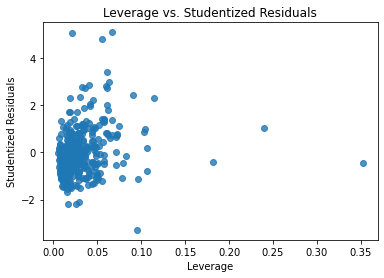

In [27]:
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

#this is leverage plot 
print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model1.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [30]:
#Concat MEDV and the resulting residual table
#Note that hat_diag is leverage so change the ciolumn heading from hat_diag to leverage
from statsmodels.formula.api import ols

MEDVres = pd.concat([boston_target_df.MEDV, inf_sum], axis = 1)
MEDVres=MEDVres.rename(columns={'hat_diag': 'leverage'})
MEDVres.head()
#studentized residuals for identifying outliers
#requested studentized residuals call them r
#studentized residuals that exceed +2 or -2 are concerning
#studentized residuals that exceed +3 or -3 are extremely concerning

r = MEDVres.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = MEDVres.sort_values(by = 'student_resid')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print (r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())
#Print all MEDV values where the studentized residuals exceed 2
print (MEDVres.MEDV[abs(r) > 2])

------------------------------ studentized residual ------------------------------
count    404.000000
mean       0.004729
std        1.017836
min       -3.506797
25%       -0.562912
50%       -0.138306
75%        0.420073
max        5.464612
Name: student_resid, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
     MEDV  dfb_const  dfb_CRIM    dfb_ZN  dfb_CHAS   dfb_NOX    dfb_RM  \
364  21.9   0.667778  0.113804  0.107776 -0.616018 -0.209043 -0.708748   
505  11.9   0.070241 -0.036201 -0.094961  0.044961 -0.123162  0.059625   
401   7.2   0.108062 -0.019858 -0.022017  0.039677 -0.015976 -0.096769   
375  15.0   0.174213 -0.131031  0.011348  0.042939 -0.017619 -0.205546   
397   8.5   0.010791  0.066082 -0.037235  0.034932 -0.007160  0.025261   

      dfb_DIS   dfb_RAD   dfb_TAX  dfb_PTRATIO     dfb_B  dfb_LSTAT   cooks_d  \
364 -0.180677  0.031865 -0.151854    -0.294940 -0.146532  -0.013238  0.105395   
505  0.111267  0.103

Now that we identified outliers, we need to see which observations can be considered to have leverage values. The leverage cutoff can be calculated as (2k+2)/n where k is the number of predictors and n is the sample size.  

In [31]:
#Identify high leverage
#point with leverage = (2k+2)/n 
#k = number of predictors (11)
#n = number of observations (506)
((2*11)+2)/506 #=0.04743083003952569 any numbner higher than this is high leverage
l = MEDVres.leverage

print ('-'*30 + ' Leverage ' + '-'*30)
print (l.describe())
print ('\n')

l_sort = MEDVres.sort_values(by = 'leverage', ascending = False)
print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (l_sort.head())

------------------------------ Leverage ------------------------------
count    404.000000
mean       0.029703
std        0.028211
min        0.005690
25%        0.014799
50%        0.020744
75%        0.036086
max        0.351723
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
     MEDV  dfb_const  dfb_CRIM    dfb_ZN  dfb_CHAS   dfb_NOX    dfb_RM  \
380  10.4   0.052078 -0.393317  0.032894 -0.008546 -0.020914 -0.048826   
418   8.8   0.064623  0.598700 -0.036948  0.026304  0.018920 -0.041332   
405   5.0   0.005872 -0.204162  0.006323 -0.003434 -0.009344  0.007857   
365  27.5   0.462435 -0.074987  0.151347 -0.084445  0.135214 -0.776065   
155  15.6   0.006989 -0.022791  0.004100 -0.137614 -0.146278  0.023760   

      dfb_DIS   dfb_RAD   dfb_TAX  dfb_PTRATIO     dfb_B  dfb_LSTAT   cooks_d  \
380 -0.031489  0.085597 -0.014302    -0.017654 -0.064719   0.050684  0.013771   
418  0.046806 -0.135088 -0.00655

We can now identify all observations with high leverage by simply using the cutoff formula.  It appears that there are 61 such observations. 

In [32]:
#point with leverage = (2k+2)/n = 0.04743083003952569
#Print all MEDV values where the leverage exceeds 0.04743083003952569
print (MEDVres.MEDV[abs(l) > ((2*11)+2)/506])

8      16.5
48     14.4
54     18.9
102    18.6
142    13.4
       ... 
450    13.4
457    13.5
488    15.2
491    13.6
492    20.1
Name: MEDV, Length: 61, dtype: float64


Now that we identified some outliers and leverage values, let’s bring them together to identify observations with significant influence.  Indeed, when an observation is both an outlier and has high leverage, it will surely impact the regression line as a result of influencing regression coefficients. 

In [33]:
#large residual and large leverage = INFLUENTIAL
#Print values that are both outliers and influential
outlier=pd.DataFrame((MEDVres.MEDV[abs(r) > 2]))
lev= pd.DataFrame((MEDVres.MEDV[abs(l) > ((2*11)+2)/506]))

#Influential1=pd.merge(outlier,lev, left_index=True, right_index=True, how='outer')
#print(Influential1)

Influential2=pd.merge(outlier,lev, left_index=True, right_index=True)
print(Influential2)

     MEDV_x  MEDV_y
162    50.0    50.0
253    42.8    42.8
364    21.9    21.9
365    27.5    27.5
367    23.1    23.1
368    50.0    50.0
369    50.0    50.0
370    50.0    50.0
372    50.0    50.0
374    13.8    13.8


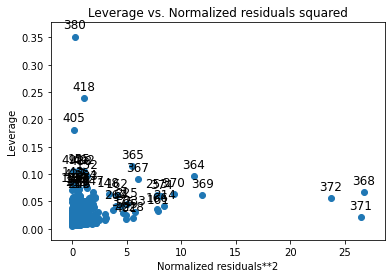

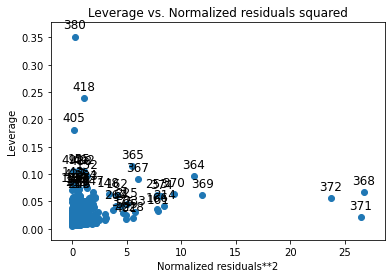

In [35]:
#Plot influential observations
#Use residual squared to restrict the graph but preserve the relative position of observations

from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(results)

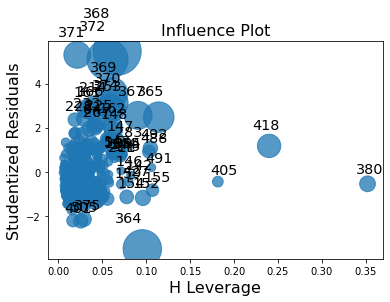

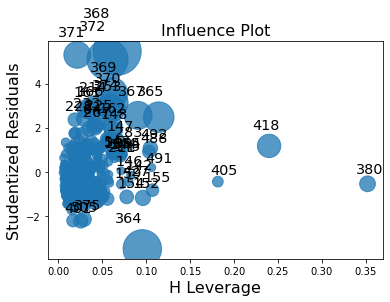

In [36]:
# plt.scatter(MEDVres.student_resid ** 2, MEDVres.leverage)
# for i, state in enumerate(boston_df.MEDV):
#     plt.annotate(state, [(MEDVres.student_resid ** 2)[i],  MEDVres.leverage[i]])
# plt.xlabel("Normalized Residuals**2")
# plt.ylabel("Leverage")
# plt.show()

influence_plot(model1)


It is also very useful to look at overall influence, which can be measured by Cook’s Distances and DFFITS.  Cook’s Distances can be 0 or higher. The higher the value, the more influential the observation is.  Many people use three times the mean of Cook’s D as a cutoff for an observation deemed influential.  

DFFITS is also designed to identify influential observations with a cutoff value of 2*sqrt(k/n).  Unlike Cook’s Distances, DFFITS can be both positive and negative, but a value close to 0 is desired as these values would have no influence on the OLS regression line. 

Now let's take a look at DFITS. The conventional cut-off point for DFITS is 2*sqrt(k/n). DFITS can be either positive or negative, with numbers close to zero corresponding to the points with small or zero influence. As we see, DFITS also indicates that DC is, by far, the most influential observation.

In [37]:
#GENERAL MEASURE OF INFLUENCE
#Identify influential observations with DFFITS
#conventional cut-off point for DFITS is 2*sqrt(k/n)
MEDVres[abs(MEDVres.dffits) > 2 * math.sqrt(11 / 506)]

MEDV  dfb_const  dfb_CRIM    dfb_ZN  dfb_CHAS   dfb_NOX    dfb_RM  \
8    16.5   0.014418 -0.050061 -0.083667 -0.002951 -0.042663  0.049326   
48   14.4   0.017437 -0.045481 -0.088051  0.013877 -0.102712  0.048886   
64   33.0  -0.207159  0.051088 -0.211019  0.004854  0.131193  0.184319   
147  14.6  -0.026524 -0.026601  0.035716 -0.065900  0.213046 -0.057535   
148  17.8  -0.051274 -0.032349  0.037266 -0.086789  0.290109 -0.045586   
152  15.3  -0.038271 -0.026719 -0.017950 -0.182158 -0.216124  0.165081   
154  17.0   0.062233 -0.017593  0.005614 -0.176540 -0.203072  0.011289   
160  27.0  -0.111657 -0.026333  0.048064 -0.215201  0.043347  0.074698   
161  50.0   0.023289  0.052877 -0.158634 -0.108908  0.032650  0.125129   
162  50.0  -0.045789  0.068297 -0.142800  0.353542 -0.023901  0.160147   
166  50.0  -0.080380  0.050223 -0.181662 -0.103124  0.026008  0.276761   
195  50.0  -0.012199 -0.015445  0.233986 -0.049258 -0.024176  0.106530   
203  48.5  -0.000492 -0.024232  0.267159 -0.039705 -0.023303  0.062146   
204  50.0  -0.014265 -0.023330  0.278170 -0.043090 -0.019706  0.083571   
214  23.7   0.100505 -0.125732 -0.013924  0.008609 -0.256122  0.046348   
220  26.7  -0.023054  0.010731  0.043633 -0.253168  0.092457 -0.050365   
225  50.0  -0.192505 -0.023800 -0.122814 -0.062804 -0.049910  0.410024   
228  46.7  -0.042968 -0.014182 -0.115096 -0.061483 -0.031781  0.183333   
233  48.3  -0.153296 -0.013060 -0.151982 -0.062702 -0.006676  0.323927   
253  42.8  -0.486193  0.050906 -0.299187  0.000914  0.188062  0.501808   
257  50.0  -0.098312 -0.006661  0.009142 -0.085638  0.093537  0.220978   
267  50.0  -0.042070 -0.020277 -0.019332 -0.092611  0.007052  0.250557   
283  50.0  -0.004325  0.013510  0.165739  0.217643 -0.048912  0.064451   
364  21.9   0.667778  0.113804  0.107776 -0.616018 -0.209043 -0.708748   
365  27.5   0.462435 -0.074987  0.151347 -0.084445  0.135214 -0.776065   
367  23.1   0.596636  0.038528  0.112987 -0.022798 -0.123231 -0.683552   
368  50.0   0.754050 -0.147772  0.186895 -0.155744 -0.078852 -1.053001   
369  50.0   0.043441 -0.050055  0.006909  0.644136 -0.122073 -0.079062   
370  50.0  -0.029700 -0.021044 -0.001071  0.564172 -0.104345  0.019566   
371  50.0   0.185875 -0.058468  0.087401 -0.115901 -0.154941 -0.189399   
372  50.0   0.227527 -0.018082  0.113256  0.926760 -0.119661 -0.381248   
374  13.8   0.207730  0.009569  0.143232  0.001497 -0.244108 -0.221656   
375  15.0   0.174213 -0.131031  0.011348  0.042939 -0.017619 -0.205546   
380  10.4   0.052078 -0.393317  0.032894 -0.008546 -0.020914 -0.048826   
418   8.8   0.064623  0.598700 -0.036948  0.026304  0.018920 -0.041332   
488  15.2  -0.031833 -0.012550 -0.012630  0.007929 -0.056892  0.004896   
492  20.1  -0.068331 -0.003000 -0.031029  0.005673 -0.042470  0.035362   
505  11.9   0.070241 -0.036201 -0.094961  0.044961 -0.123162  0.059625   

      dfb_DIS   dfb_RAD   dfb_TAX  dfb_PTRATIO     dfb_B  dfb_LSTAT   cooks_d  \
8    0.117518  0.025849 -0.002787    -0.155824  0.045631   0.254392  0.008823   
48   0.075503  0.044910 -0.047489    -0.082024  0.041501   0.289413  0.010147   
64   0.379180  0.019276 -0.043349     0.030771  0.015285   0.077595  0.016549   
147  0.063969 -0.052269 -0.025911    -0.098059  0.061737   0.093173  0.011851   
148  0.095624 -0.080598 -0.029649    -0.118579  0.040759   0.113938  0.019175   
152 -0.069400  0.062185  0.001031     0.047754  0.033268   0.145440  0.012625   
154 -0.094238  0.083650 -0.015025     0.026144  0.026296   0.038254  0.009230   
160  0.040379  0.074654 -0.091911     0.099000  0.046375   0.092626  0.007553   
161 -0.054141 -0.185934  0.208044    -0.201813  0.009116  -0.194547  0.022118   
162  0.003501 -0.177235  0.200534    -0.109009  0.018286  -0.075646  0.023407   
166 -0.022367 -0.210875  0.223316    -0.184838  0.025159  -0.074154  0.024560   
195 -0.120193  0.060754 -0.061441    -0.030240  0.016529   0.036090  0.011262   
203 -0.162787  0.078224 -0.099536     0.021209  0.008340   0.0381

In [38]:
#Cook's D of more than 3 times the mean is a possible outlier
#MEDVres.loc[:,"cooks_d"].mean()
cutoff=(MEDVres.loc[:,"cooks_d"].mean())*3
outlier2=pd.DataFrame((MEDVres.MEDV[abs(MEDVres.cooks_d) > cutoff]))
print(outlier2)

     MEDV
64   33.0
147  14.6
148  17.8
152  15.3
161  50.0
162  50.0
166  50.0
214  23.7
225  50.0
233  48.3
253  42.8
267  50.0
364  21.9
365  27.5
367  23.1
368  50.0
369  50.0
370  50.0
371  50.0
372  50.0
374  13.8
380  10.4
418   8.8


The yellowbrick package allows us to visualize Cook’s Distances. 

C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


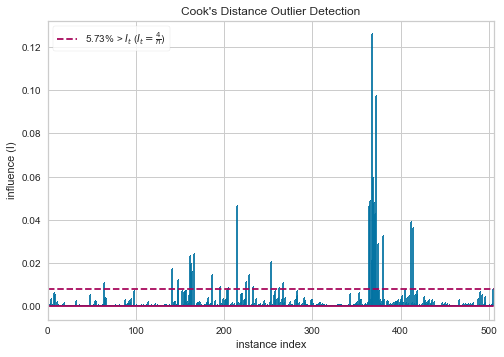

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [40]:
from yellowbrick.regressor import CooksDistance

y = boston_target_df['MEDV']
X = boston_features_df

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

And this brings us to DFBETAS.  Cook’s Distances and DFFITS are general measures of influence, while DFBETAS are variable specific. It shows how influential each observation is on the corresponding coefficients.  DFBETAS are provided as part of the influence.summary_frame() output but is is worth visualizing it. 

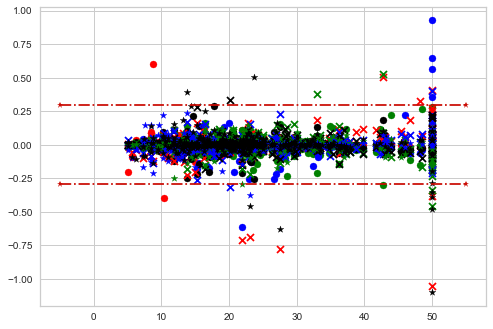

In [41]:
#Visulize influential observaions
#dfbetas above 2/sqrt(n) is suspect

plt.scatter(MEDVres.MEDV, MEDVres.dfb_CRIM, color = "red", marker = "o")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_ZN, color = "green", marker = "o")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_CHAS, color = "blue", marker = "o")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_NOX, color = "black", marker = "o")

plt.scatter(MEDVres.MEDV, MEDVres.dfb_RM, color = "red", marker = "x")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_DIS, color = "green", marker = "x")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_RAD, color = "blue", marker = "x")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_TAX, color = "black", marker = "x")

plt.scatter(MEDVres.MEDV, MEDVres.dfb_PTRATIO, color = "green", marker = "*")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_B, color = "blue", marker = "*")
plt.scatter(MEDVres.MEDV, MEDVres.dfb_LSTAT, color = "black", marker = "*")

plt.plot((-5, 55), (0.295, 0.295), '-.r*')
plt.plot((-5, 55), (-0.295, -0.295), '-.r*')

# plt.plot((-5, 55), (0.28, 0.28), 'k-')
# plt.plot((-5, 55), (-0.28, -0.28), 'k-')

So let’s use the findings.  I fitted two different regression models.  First, I removed the observations that were deemed influential and fitted an OLS model.  Second, I removed all outliers, and then fitted another OLS model.  

In [47]:
#Remove influential observations and rerun regression
boston_alt_x=boston_features_df.drop([163,253,364,365,367,368,369,370,412,414])
boston_alt_y=boston_target_df.drop([163,253,364,365,367,368,369,370,412,414])

#Remove influential observations and rerun regression
boston_alt_x2=boston_features_df.drop([64, 147, 148, 161, 162, 163,166, 186, 195, 214, 225, 233, 267, 364, 365,367,368,369,370,380, 412,414])
boston_alt_y2=boston_target_df.drop([64, 147, 148, 161, 162, 163,166, 186, 195, 214, 225, 233, 267, 364, 365,367,368,369,370,380, 412,414])

#Partition dataset
import sklearn
from sklearn.model_selection import train_test_split #sklearn import does not automatically install sub packages

X = boston_alt_x
Y = boston_alt_y

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

#Partition dataset
import sklearn
from sklearn.model_selection import train_test_split #sklearn import does not automatically install sub packages

X2 = boston_alt_x2
Y2 = boston_alt_y2

X2_train, X2_test, Y2_train, Y2_test = sklearn.model_selection.train_test_split(X2, Y2, test_size = 0.20, random_state = 5)

from statsmodels.formula.api import ols
import statsmodels.api as sm

#Model statistics
model_alt = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print_model_alt = model_alt.summary()
print(print_model_alt)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          4.83e-117
Time:                        18:42:29   Log-Likelihood:                -1126.6
No. Observations:                 396   AIC:                             2281.
Df Residuals:                     382   BIC:                             2337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8863      5.696      3.667      0.0

A comparison of the AIC and BIC values of this model to the initial model shows that our model fit improved as a result of removing the influential observations.  

In [48]:
from statsmodels.formula.api import ols

#Model statistics
model_alt2 = sm.OLS(Y2_train, sm.add_constant(X2_train)).fit()
print_model_alt2 = model_alt2.summary()
print(print_model_alt2)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     123.2
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          4.14e-126
Time:                        18:42:36   Log-Likelihood:                -1057.7
No. Observations:                 387   AIC:                             2143.
Df Residuals:                     373   BIC:                             2199.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4062      5.097      3.808      0.0

The model above was fitted after removing all outliers based on the Cook’s Distance analysis.  The model fit improved even further and the R squared value increased compared to the initial fit and the fit based on variables without influential observations. 